In [1]:
from tensorflow import keras

from keras.applications import InceptionV3
from keras.layers import Dense,Flatten
from keras.models import Model
from glob import glob
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img

import matplotlib.pyplot as plt

In [2]:
##Image Size

image_size = [224,224]

train_path = "Datasets/Train/"
test_path =  "Datasets/Test/"

In [3]:
##Importing the Resnet50 Library

inception = InceptionV3(input_shape = image_size + [3],weights = "imagenet",include_top = False)

In [4]:
inception.trainable = False

In [5]:
folders = glob("Datasets/Train/*")
len(folders)

4

In [6]:
#Flattening the Layers

x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders),activation = "softmax")(x)

#Creating the Model Object

model = Model(inputs = inception.input,outputs = prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
#Compiling the Model

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = "accuracy")

In [10]:
##Image Data Generator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)

In [11]:
##Creating the training set

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")


Found 96 images belonging to 4 classes.


In [12]:
test_set = train_datagen.flow_from_directory(test_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 93 images belonging to 4 classes.


In [14]:
##Fit the model

final = model.fit_generator(
    training_set,
    steps_per_epoch = len(training_set),
    epochs = 30,
    validation_data = test_set,
    validation_steps = len(test_set)
)

Epoch 1/30
3/3 [==============================] - 10s 3s/step - loss: 1.8583e-04 - accuracy: 1.0000 - val_loss: 3.3741 - val_accuracy: 0.6344
Epoch 2/30
3/3 [==============================] - 15s 5s/step - loss: 6.7468e-04 - accuracy: 1.0000 - val_loss: 3.8403 - val_accuracy: 0.6774
Epoch 3/30
3/3 [==============================] - 23s 8s/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.8646 - val_accuracy: 0.7097
Epoch 4/30
3/3 [==============================] - 25s 8s/step - loss: 6.3703e-04 - accuracy: 1.0000 - val_loss: 3.4257 - val_accuracy: 0.7097
Epoch 5/30
3/3 [==============================] - 26s 9s/step - loss: 1.6821e-05 - accuracy: 1.0000 - val_loss: 3.2215 - val_accuracy: 0.6452
Epoch 6/30
3/3 [==============================] - 17s 6s/step - loss: 3.1577e-06 - accuracy: 1.0000 - val_loss: 2.9029 - val_accuracy: 0.6774
Epoch 7/30
3/3 [==============================] - 18s 6s/step - loss: 8.8254e-05 - accuracy: 1.0000 - val_loss: 3.4760 - val_accuracy: 0.7204
Epoch 8/30

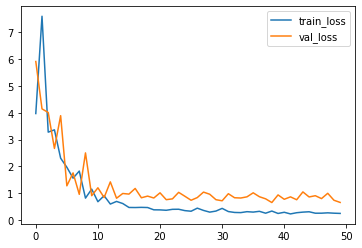

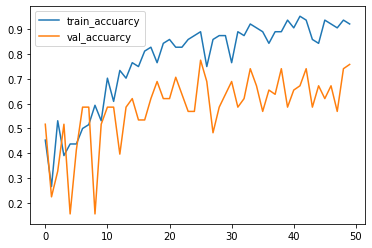

In [14]:
#Plot the Loss
plt.plot(final.history["loss"],label = "train_loss")
plt.plot(final.history["val_loss"],label = "val_loss")
plt.legend()
plt.show()

#Plot the Accuracy
plt.plot(final.history["accuracy"],label = "train_accuarcy")
plt.plot(final.history["val_accuracy"],label = "val_accuarcy")
plt.legend()
plt.show()

In [15]:
##Saving the Model

from keras.models import load_model

model.save("model_inceptionv3.h5")

In [17]:
y_pred = model.predict(test_set)

In [18]:
y_pred[0]

array([0.15381531, 0.06868582, 0.7774989 ], dtype=float32)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred,axis = 1)

In [20]:
y_pred

array([2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1])

In [21]:
from keras.preprocessing import image

In [22]:
model = load_model("model_inceptionv3.h5")

In [27]:
#Test data

img = load_img("Datasets/Test/lamborghini/1.jpg",target_size = (224,224))

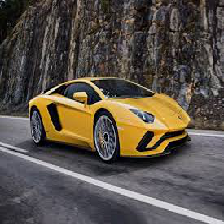

In [28]:
img

In [29]:
img_data = image.img_to_array(img)

In [30]:
img_data.shape

(224, 224, 3)

In [31]:
img_data = img_data/255
img_data = np.expand_dims(img_data,axis = 0)

In [32]:
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

array([[0.00632895, 0.60026973, 0.39340135]], dtype=float32)

In [34]:
np.argmax(model.predict(img_data))

1